Algoritmos


In [4]:
def insertion_sort(items: list[int]):
    len_items = len(items)
    for i in range(1, len_items):
        j = i
        while j > 0 and items[j] < items[j - 1]:
            items[j], items[j - 1] = items[j - 1], items[j]
            j -= 1


def lomuto_partition(
    items: list[int],
    left: int,
    right: int,
):
    pivot = items[right]
    i = left - 1

    for j in range(left, right):
        if items[j] <= pivot:
            i += 1
            items[i], items[j] = items[j], items[i]
    right_place = i + 1
    items[right_place], items[right] = items[right], items[right_place]
    return right_place


def quick_select(items: list[int], left: int, right: int, k: int):
    index = lomuto_partition(items, left, right)
    search = k - 1

    if index == search:
        return items[index]
    else:
        if index > search:
            return quick_select(items, left, index - 1, k)
        else:
            return quick_select(items, index + 1, right, k)


def median_quick(A):
    len_arr = len(A)
    median = quick_select(A, 0, len_arr - 1, (len_arr // 2) + 1)
    return median


def median_brute(A):
    insertion_sort(A)
    median_index = len(A) // 2
    median = A[median_index]
    return median

In [5]:
A = [3, 9, 4, 7, 1, 2, 8, 5, 6]

brute_arr = A.copy()

print("-> Before brutal", brute_arr)
brutal_element = median_brute(brute_arr)
print("-> After brutal", brute_arr)
print("-> Brutal element =", brutal_element)
print("-> Brutal index", len(brute_arr) // 2)

quick_arr = A.copy()
print("-> Before quick", quick_arr)
quick_element = median_quick(quick_arr)
print("-> After quick", quick_arr)
print("-> Quick element", quick_element)
print("-> Quick index", len(quick_arr) // 2)

-> Before brutal [3, 9, 4, 7, 1, 2, 8, 5, 6]
-> After brutal [1, 2, 3, 4, 5, 6, 7, 8, 9]
-> Brutal element = 5
-> Brutal index 4
-> Before quick [3, 9, 4, 7, 1, 2, 8, 5, 6]
-> After quick [3, 4, 1, 2, 5, 6, 8, 9, 7]
-> Quick element 5
-> Quick index 4


Coleta dados


In [6]:
import time
from numpy import random


# scope of the randomness
DOMAIN = 9999999

# defines the number of times each algorithm will be processed to find the average time
num_rounds = 100

alg_results = dict()


# calculates the executions average time
def avgTime(func, size, debug=False):
    t = 0
    for i in range(num_rounds):
        random.seed(size + i)
        # create a list with random numbers
        dataList = random.randint(DOMAIN, size=size).tolist()

        start = time.time()
        m = func(dataList)
        end = time.time()
        t += end - start

        if debug:
            sorted_data = sorted(dataList)
            correct_median = sorted_data[len(dataList) // 2]
            if m != correct_median:
                print(
                    f"size={size}, seed={size+i}, m={m} e correct median={correct_median}"
                )
            assert m == correct_median

    return t / num_rounds


# defines the algorithms to be processed
algorithms = [median_brute, median_quick]

# sizes
sizes = [i for i in range(1000, 5001, 1000)]
mapSizeToTime = dict()
for i in range(len(sizes)):
    print(f"Starting collect {i+1}")

    # map list size to algorithm average time
    for algorithm in algorithms:
        print("  > ", algorithm.__name__)
        mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(
            algorithm, sizes[i], True
        )
    print("")

print("Finish data collection")

Starting collect 1
  >  median_brute
  >  median_quick

Starting collect 2
  >  median_brute
  >  median_quick

Starting collect 3
  >  median_brute
  >  median_quick

Starting collect 4
  >  median_brute
  >  median_quick

Starting collect 5
  >  median_brute
  >  median_quick

Finish data collection


Formata dados


In [7]:
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient="index", columns=["Time"])
df["Algorithm"] = [i.split("##")[0] for i in df.index]
df["Size"] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
median_brute##1000,0.023749,median_brute,1000
median_quick##1000,0.000147,median_quick,1000
median_brute##2000,0.101087,median_brute,2000
median_quick##2000,0.000318,median_quick,2000
median_brute##3000,0.233412,median_brute,3000
median_quick##3000,0.000463,median_quick,3000
median_brute##4000,0.408072,median_brute,4000
median_quick##4000,0.000598,median_quick,4000
median_brute##5000,0.606840,median_brute,5000
median_quick##5000,0.000798,median_quick,5000


Gráfico


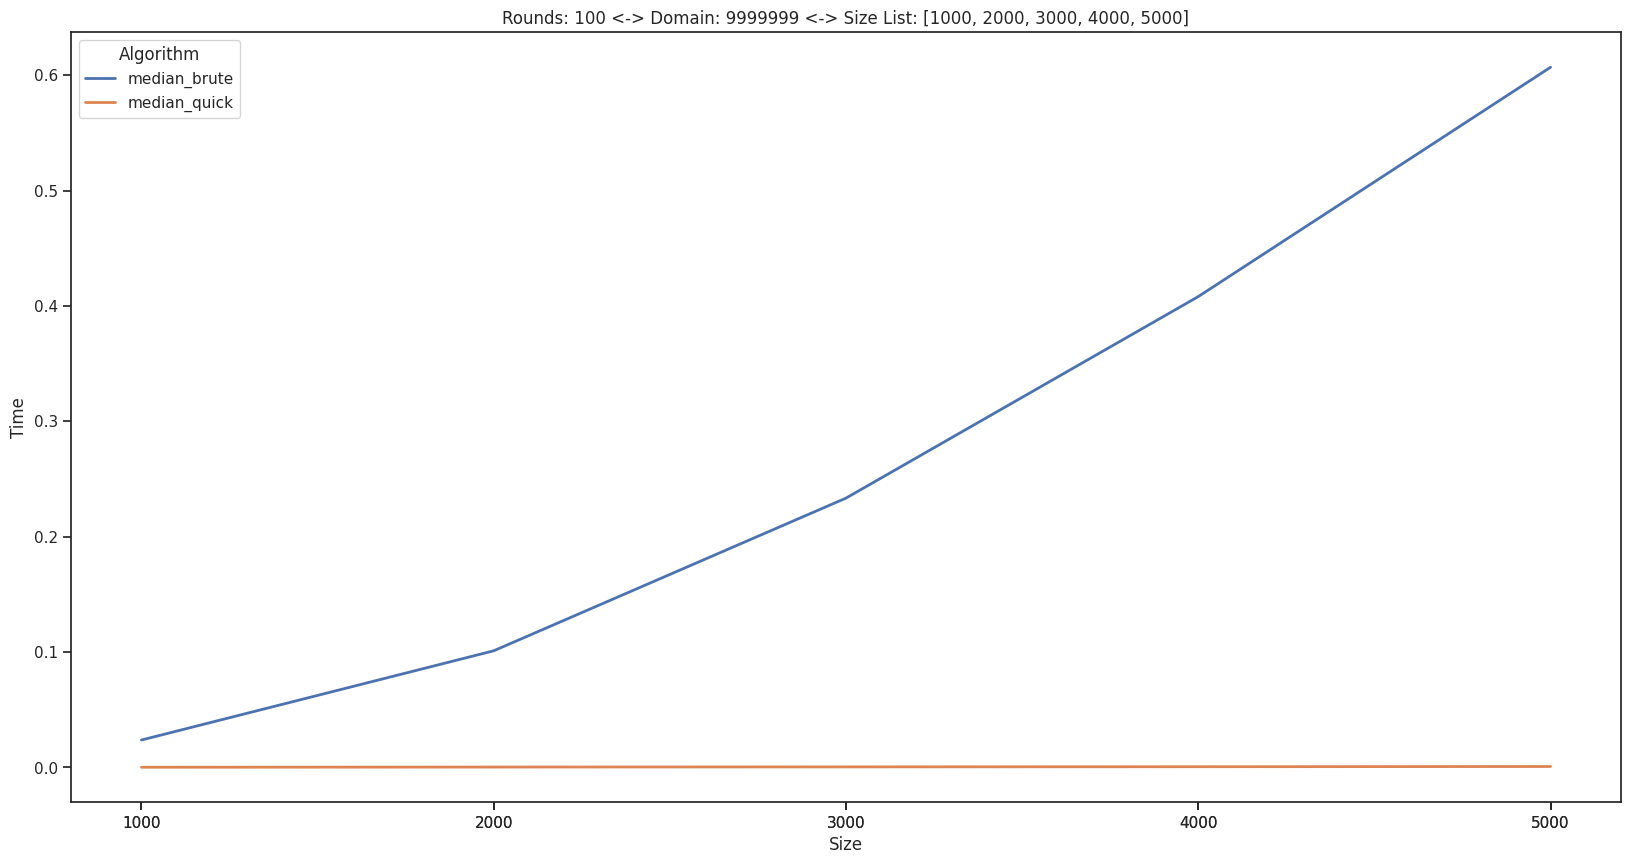

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defines font size and line width
sns.set_theme(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

# Defines plot size
plt.rcParams["figure.figsize"] = [20, 10]

fig = plt.figure()
chart = sns.lineplot(x="Size", y="Time", hue="Algorithm", data=df)
plt.title(f"Rounds: {num_rounds} <-> Domain: {DOMAIN} <-> Size List: {sizes}")

chart.set(xticks=[i for i in df.Size])

plt.savefig("median.png", bbox_inches="tight")